In [17]:
import rasterio as rs
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
import urllib
import glob
import shutil
import geopandas
import shapely
import rioxarray
from shapely.geometry import mapping
import torch
import time

In [9]:
smap_soilmoistureprofile[0]

In [ ]:
def clip2miss(raster,basin):
    rast = rioxarray.open_rasterio(raster,engine="rasterio")
    r_clip = rast.rio.clip(basin.geometry.apply(mapping),basin.crs)
#     plt.imshow(np.where(r_clip[0]<0,np.nan,r_clip[0]))
    r_clip.to_netcdf('smap_ee_miss_smp/miss_{}.nc'.format(raster[34:51]))
    return r_clip

raster = 'smap_smp_ee/tifs/NASA_USDA_SMAP_SM20150402_20150404.smp.tif' #selected first 
basin = geopandas.read_file('mississippi/Miss_RiverBasin/Miss_RiverBasin.shp')

mississippi_soilmoistureprofile = clip2miss(raster,basin)

In [28]:

'miss_{}.nc'.format(raster[34:51])

'miss_20150402_20150404.nc'

In [11]:
mississippi_soilmoistureprofile.to_netcdf('test.nc')

In [13]:
!ls

MississippiRive.zip  mississippi	smap_links.npy	    smap_ssm_ee
Untitled.ipynb	     smap_ee_links.txt	smap_smp_ee	    test.nc
ee_smap.ipynb	     smap_first.tif	smap_smp_links.npy


In [58]:
smap_soilmoistureprofile = glob.glob('smap_smp_ee/tifs/*.tif')
smap_soilmoistureprofile[0]

'smap_smp_ee/tifs/NASA_USDA_SMAP_SM20150402_20150404.smp.tif'

In [10]:
type(mississippi_soilmoistureprofile)

xarray.core.dataarray.DataArray

In [55]:
import os

In [57]:
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'MississippiRive.zip',
 'Untitled.ipynb',
 'ee_smap.ipynb',
 'mississippi',
 'smap_ee_links.txt',
 'smap_ee_miss_smp',
 'smap_first.tif',
 'smap_links.npy',
 'smap_smp_ee',
 'smap_smp_links.npy',
 'smap_ssm_ee',
 'test.nc']

In [63]:
for idx,x in enumerate(smap_soilmoistureprofile):
    clip2miss(x,basin)

In [35]:
pwd

'/scratch/albertl_uri_edu'

In [36]:
ls

MississippiRive.zip  mississippi/       smap_first.tif  smap_smp_links.npy
Untitled.ipynb       smap_ee_links.txt  smap_links.npy  smap_ssm_ee/
ee_smap.ipynb        smap_ee_miss_smp/  smap_smp_ee/    test.nc


In [ ]:
cd ~/scratch/smap_smp_ee/tifs/

In [64]:
z = glob.glob('smap_ee_miss_smp/*.nc')
len(z)

841

In [76]:
a = xr.open_dataset(z[100])
a

<xarray.Dataset>
Dimensions:                        (band: 1, x: 256, y: 222)
Coordinates:
  * y                              (y) float64 49.64 49.55 49.45 ... 29.02 28.92
  * x                              (x) float64 -113.8 -113.7 ... -78.12 -77.98
  * band                           (band) int64 1
Data variables:
    spatial_ref                    int64 ...
    __xarray_dataarray_variable__  (band, y, x) float32 ...

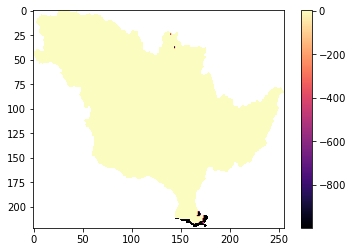

In [70]:
plt.imshow(a.__xarray_dataarray_variable__[0],cmap='magma')
plt.colorbar()

In [71]:
a.spatial_ref

<xarray.DataArray 'spatial_ref' ()>
array(0)
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    GeoTransform:                 -113.9055625 0.140625 0.0 49.687625 0.0 -0....

In [119]:
a = a.rename({'hi':'sm profile (%)'})
a

ValueError: cannot rename 'hi' because it is not a variable or dimension in this dataset

In [74]:
a

<xarray.Dataset>
Dimensions:                        (band: 1, x: 256, y: 222)
Coordinates:
  * y                              (y) float64 49.64 49.55 49.45 ... 29.02 28.92
  * x                              (x) float64 -113.8 -113.7 ... -78.12 -77.98
  * band                           (band) int64 1
Data variables:
    spatial_ref                    int64 0
    __xarray_dataarray_variable__  (band, y, x) float32 nan nan nan ... nan nan

In [136]:
z[0]

'smap_ee_miss_smp/miss_20150402_20150404.nc'

In [92]:
z[0][17:42]

'miss_20150402_20150404.nc'

In [93]:
pwd

'/scratch/albertl_uri_edu'

In [94]:
z[0]

'smap_ee_miss_smp/miss_20150402_20150404.nc'

In [138]:
for x in z:
    y = xr.open_dataset(x)
    y = y.rename({'__xarray_dataarray_variable__':'sm_profile'})
    y.attrs['sm_profile'] = \
    "soil moisture profile is measured in percentage & is a ratio "\
    "of water to soil optically \nobtained from SMAP with filtering included\n\n"\
    "https://developers.google.com/earth-engine/datasets/catalog/NASA_USDA_HSL_SMAP10KM_soil_moisture#citations"
    y.to_netcdf('{}'.format('smap_ee_miss_smp_metadata/{}'.format(x[17:42])))

In [96]:
q = xr.open_dataset('/home/albertl_uri_edu/scratch/miss_20150402_20150404.nc')
q

<xarray.Dataset>
Dimensions:         (band: 1, x: 256, y: 222)
Coordinates:
  * y               (y) float64 49.64 49.55 49.45 49.36 ... 29.11 29.02 28.92
  * x               (x) float64 -113.8 -113.7 -113.6 ... -78.26 -78.12 -77.98
  * band            (band) int64 1
Data variables:
    spatial_ref     int64 ...
    sm profile (%)  (band, y, x) float32 ...

In [121]:
q.attrs={}

In [117]:
q.attrs['sm_profile'] = 'soil moisture profile is measured in percentage & is ratio of water to soil optically obtained from SMAP with filtering included'

In [133]:
    q.attrs['sm_profile'] = \
    "soil moisture profile is measured in percentage & is a ratio "\
    "of water to soil optically \nobtained from SMAP with filtering included\n\n"\
    "https://developers.google.com/earth-engine/datasets/catalog/NASA_USDA_HSL_SMAP10KM_soil_moisture#citations"
q

<xarray.Dataset>
Dimensions:         (band: 1, x: 256, y: 222)
Coordinates:
  * y               (y) float64 49.64 49.55 49.45 49.36 ... 29.11 29.02 28.92
  * x               (x) float64 -113.8 -113.7 -113.6 ... -78.26 -78.12 -77.98
  * band            (band) int64 1
Data variables:
    spatial_ref     int64 0
    sm profile (%)  (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    sm_profile:  soil moisture profile is measured in percentage & is a ratio...

In [108]:
q = q.drop(['units'])

ValueError: One or more of the specified variables cannot be found in this dataset

In [109]:
q

<xarray.Dataset>
Dimensions:         (band: 1, x: 256, y: 222)
Coordinates:
  * y               (y) float64 49.64 49.55 49.45 49.36 ... 29.11 29.02 28.92
  * x               (x) float64 -113.8 -113.7 -113.6 ... -78.26 -78.12 -77.98
  * band            (band) int64 1
Data variables:
    spatial_ref     int64 0
    sm profile (%)  (band, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    units:             %
    sm_profile_units:  %

In [139]:
m = xr.open_dataset('smap_ee_miss_smp_metadata/miss_20150402_20150404.nc')
m

<xarray.Dataset>
Dimensions:      (band: 1, x: 256, y: 222)
Coordinates:
  * y            (y) float64 49.64 49.55 49.45 49.36 ... 29.2 29.11 29.02 28.92
  * x            (x) float64 -113.8 -113.7 -113.6 ... -78.26 -78.12 -77.98
  * band         (band) int64 1
Data variables:
    spatial_ref  int64 ...
    sm_profile   (band, y, x) float32 ...
Attributes:
    sm_profile:  soil moisture profile is measured in percentage & is a ratio...

In [21]:
import torch
import time
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms, models
from PIL import Image
from matplotlib import pyplot as plt
import os
import numpy as np
from math import log10
from torch.autograd import Variable
from random import choice
from torch.utils.data import random_split
from sklearn.metrics import mean_squared_error
# import pytorch_ssim
# import arrow
from torchinfo import summary


from datetime import datetime
from pytz import timezone
import scipy.ndimage
east = timezone('US/Eastern')

In [22]:
def nc2torch(i):
    return torch.from_numpy(np.asarray(i)).unsqueeze(0)

# m = xr.open_dataset('smap_ee_miss_smp_metadata/miss_20190505_20190507.nc')
# w = xr.open_dataset('smap_ee_miss_smp_metadata/miss_20150402_20150404.nc')
# m1 = nc2torch(m.sm_profile)
# w1 = nc2torch(w.sm_profile)

In [4]:
dset = torch.empty([0,1,222,256])
t2 = []

for x in sorted(glob.glob('smap_ee_miss_smp_metadata/*.nc')):
    t0 = time.time()
    y = xr.open_dataset(x)
    z = nc2torch(y.sm_profile)
    dset = torch.cat((dset,z))
    t1 = time.time()
    t2.append(t1-t0)
#     break
dset.shape

torch.Size([841, 1, 222, 256])

In [5]:
torch.save(dset,'imz.pt')

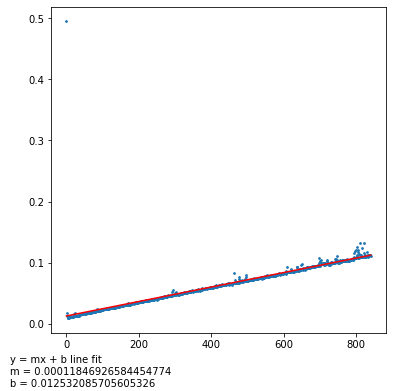

In [15]:
h = np.linspace(0,dset.shape[0],dset.shape[0])

line = np.polyfit(h,t2,1)
p = np.poly1d(line)

fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(h,t2,s=3)
ax.plot(h,p(h),'red')
ax.annotate("y = mx + b line fit\n"
            f"m = {line[0]}\n"
            f"b = {line[1]}",
            xy=(10, 5), xycoords='figure pixels');

In [20]:
dset.shape

torch.Size([841, 1, 222, 256])

In [ ]:
<b> MLP

shape of x torch.Size([100, 6400])
shape of y torch.Size([100, 1])
training started at 2022-03-04 16:27:09
training time 0.05070 minutes


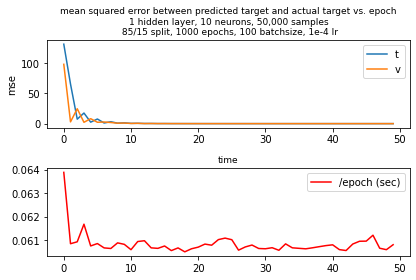

In [25]:
class setter(Dataset):
    def __init__(self,x,y):
        self.x = torch.load(x)[:100,:,:,:].reshape(100,-1)
        self.y = torch.load(y)[:100,:,8,9].reshape(100,1)

        print('shape of x',self.x.shape)
        print('shape of y',self.y.shape)
#         rand_pts = torch.from_numpy(np.random.randint(0,self.x.shape[0],1000))
#         self.x = self.x[rand_pts]
#         self.y = self.y[rand_pts]
    def __getitem__(self,idx):
        x = self.x[idx].to('cuda')
#         x -= torch.min(x)
#         x /= torch.max(x)
        y = self.y[idx].to('cuda')
#         y -= torch.min(y)
#         y /= torch.max(y)
        return x, y
    def __len__(self):
        return self.x.shape[0]

class MLP(torch.nn.Module):
    def __init__(self,kernel_size):
        super(MLP,self).__init__()
        self.fci = torch.nn.Linear(cube_size**2,10000)
        self.fco = torch.nn.Linear(10000,1)
        self.relu = torch.nn.ReLU()
#         self.dropout = torch.nn.Dropout(0.5)

    def forward(self,x):
        x = self.relu(self.fci(x.view(x.size(0), -1)))
        x = self.fco(x)
        return x

    
# nn_ds_size = 1000
dset = setter('amsgan_80x80.pt','modgan_80x80.pt')
cube_size = 80
epochs=50
batch_size=25
train_dset_size = int(0.85*len(dset))
valid_dset_size = int(len(dset) - train_dset_size)
train_dset, valid_dset = random_split(dset,[train_dset_size,valid_dset_size])
train_dataloader = DataLoader(dataset=train_dset, batch_size=batch_size, shuffle=False)
valid_dataloader = DataLoader(dataset=valid_dset, batch_size=batch_size, shuffle=False)
model = MLP(cube_size)
model.cuda()
optimizer = torch.optim.AdamW(model.parameters(),lr=1e-4)
criterion = torch.nn.MSELoss(reduction='mean')
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer=optimizer,step_size=150,verbose=False)


print('training started at {}'.format(datetime.now(east).strftime('%Y-%m-%d %H:%M:%S')))
t_loss = []
v_loss = []
e_time = []
t0 = time.time()
for i in range(epochs):
    t_e_loss = 0
    v_e_loss = 0
    t00 = time.time()
    model.train()
    for idx,(x,y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        predicted = model(x)
        loss = criterion(predicted,y)
        loss.backward()
        optimizer.step()
        t_e_loss += loss.item()
    for xx,yy in valid_dataloader:
        v_pred = model(xx)
        loss2 = criterion(v_pred,yy)
        v_e_loss += loss2.item()
    t_loss.append(t_e_loss/len(train_dataloader))
    v_loss.append(v_e_loss/len(valid_dataloader))
    t11 = time.time()
    e_time.append(t11-t00)
t1 = time.time()
print('training time {} minutes'.format(np.format_float_positional((t1-t0)/60,precision=5)))

fig = plt.figure()
fig.add_subplot(211)
plt.title('mean squared error between predicted target and actual target vs. epoch\n1 hidden layer, 10 neurons, 50,000 samples\n 85/15 split, 1000 epochs, 100 batchsize, 1e-4 lr',fontsize=9)
plt.plot(t_loss)
plt.plot(v_loss)
plt.legend(['t','v'])
plt.ylabel('mse')
fig.add_subplot(212)
plt.title('time',fontsize=9)
plt.tight_layout()
plt.plot(e_time,color='red')
# plt.plot(np.cumsum(e_time),color='green')
plt.legend(['/epoch (sec)','cum (min)'])

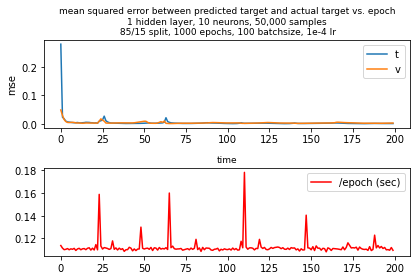

In [177]:
fig = plt.figure()
fig.add_subplot(211)
plt.yscale("linear")
plt.title('mean squared error between predicted target and actual target vs. epoch\n1 hidden layer, 10 neurons, 50,000 samples\n 85/15 split, 1000 epochs, 100 batchsize, 1e-4 lr',fontsize=9)
plt.plot(t_loss)
plt.plot(v_loss)
plt.legend(['t','v'])
plt.ylabel('mse')
fig.add_subplot(212)
plt.title('time',fontsize=9)
plt.tight_layout()
plt.plot(e_time,color='red')
# plt.plot(np.cumsum(e_time),color='green')
plt.legend(['/epoch (sec)','cum (min)'])

In [ ]:
<b> "Larson et al." </b>

1
NVIDIA GeForce RTX 2080 Ti
shape of x torch.Size([100, 80, 80])
shape of y torch.Size([100, 1])
100
80
10
10
Layer (type:depth-idx)                   Output Shape              Param #
LARSONet                                 --                        --
├─Linear: 1-1                            [25, 3200]                20,483,200
├─ReLU: 1-2                              [25, 3200]                --
├─Linear: 1-3                            [25, 1600]                5,121,600
├─ReLU: 1-4                              [25, 1600]                --
├─Linear: 1-5                            [25, 800]                 1,280,800
├─ReLU: 1-6                              [25, 800]                 --
├─Linear: 1-7                            [25, 100]                 80,100
├─ReLU: 1-8                              [25, 100]                 --
├─Linear: 1-9                            [25, 1]                   101
Total params: 26,965,801
Trainable params: 26,965,801
Non-trainable params: 0
Total mul

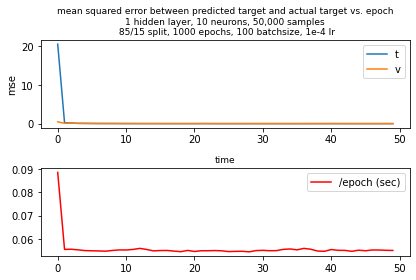

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image
from matplotlib import pyplot as plt
import os
import numpy as np
from math import log10
from torch.autograd import Variable
from random import choice
from torch.utils.data import random_split
from sklearn.metrics import mean_squared_error
# import pytorch_ssim
# import arrow
from torchinfo import summary

torch.cuda.empty_cache()
torch.cuda.current_device()
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

class LARSONet(nn.Module):
    def __init__(self):
        super(LARSONet, self).__init__()
#         # in layer
#         self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1, bias=False)
        self.relu = nn.ReLU(inplace=True)
#         # hidden layers
#         hidden_layers = []
#         for i in range(2):
#             hidden_layers.append(nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1, bias=False))
#             hidden_layers.append(nn.BatchNorm2d(64))
#             hidden_layers.append(nn.ReLU(inplace=True))
#         self.mid_layer = nn.Sequential(*hidden_layers)
#         # out layer
#         self.conv3 = nn.Conv2d(in_channels=64, out_channels=1, kernel_size=5, padding=1, bias=False) #anything below this is for shrinking 
        self.linear1 = nn.Linear(cube_size**2,3200)
        self.linear2 = nn.Linear(3200,1600)
        self.linear3 = nn.Linear(1600,800)
        self.linear4 = nn.Linear(800,100)
        self.linear5 = nn.Linear(100,1)

    def forward(self, x):
#         out1 = self.relu(self.conv1(x))
#         out = self.mid_layer(out1)
#         o = self.conv3(out+out1)
#         print('output from conv layer', o.shape)
        o = self.relu(self.linear1(x.view(x.size(0), -1)))
        o = self.relu(self.linear2(o))
        o = self.relu(self.linear3(o))
        o = self.relu(self.linear4(o))
        o = self.linear5(o)
        return o
    
class setter(Dataset):
    def __init__(self,x,y):
        self.x = torch.load(x)[:100,:,:,:].reshape(100,80,80)
        self.y = torch.load(y)[:100,:,8,9].reshape(100,1)

        print('shape of x',self.x.shape)
        print('shape of y',self.y.shape)
#         rand_pts = torch.from_numpy(np.random.randint(0,self.x.shape[0],1000))
#         self.x = self.x[rand_pts]
#         self.y = self.y[rand_pts]
    def __getitem__(self,idx):
        x = self.x[idx].to('cuda')
#         x -= torch.min(x)
#         x /= torch.max(x)
        y = self.y[idx].to('cuda')
#         y -= torch.min(y)
#         y /= torch.max(y)
        return x, y
    def __len__(self):
        return self.x.shape[0]
    

# def weights_init(m):
#     classname = m.__class__.__name__
#     if classname.find('Conv') != -1:
#         nn.init.normal_(m.weight.data,0.0,0.02)
#     elif classname.find('BatchNorm') != -1:
#         nn.init.normal_(m.weight.data,1.0,0.02)
#         nn.init.constant_(m.bias.data,0)    
        
dset = setter('amsgan_80x80.pt','modgan_80x80.pt')
cube_size = 80
print(len(dset))
# print(dset[0])


train_dset_size = int(0.80*len(dset)); print(train_dset_size)
valid_dset_size = int(0.5*(len(dset) - train_dset_size)); print(valid_dset_size)
test_dset_size = int(0.5*(len(dset) - train_dset_size)); print(test_dset_size)

train_dset, valid_dset, test_dset = random_split(dset,[train_dset_size,valid_dset_size,test_dset_size])

train_dataloader = DataLoader(dataset=train_dset, batch_size=10, shuffle=True, num_workers=0)
valid_dataloader = DataLoader(dataset=valid_dset, batch_size=10, shuffle=True, num_workers=0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LARSONet().to(device)

print(summary(model,input_size=(batch_size,1,80,80)))

# model.apply(weights_init)
criterion = nn.MSELoss(reduction="mean")
lr = 1e-3
optimizer = optim.Adam(model.parameters(), lr=lr)

print('training started at {}'.format(datetime.now(east).strftime('%Y-%m-%d %H:%M:%S')))
t_loss = []
v_loss = []
e_time = []
t0 = time.time()
for i in range(epochs):
    t_e_loss = 0
    v_e_loss = 0
    t00 = time.time()
    model.train()
    for idx,(x,y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        predicted = model(x)
        loss = criterion(predicted,y)
        loss.backward()
        optimizer.step()
        t_e_loss += loss.item()
    for xx,yy in valid_dataloader:
        v_pred = model(xx)
        loss2 = criterion(v_pred,yy)
        v_e_loss += loss2.item()
    t_loss.append(t_e_loss/len(train_dataloader))
    v_loss.append(v_e_loss/len(valid_dataloader))
    t11 = time.time()
    e_time.append(t11-t00)
t1 = time.time()
print('training time {} minutes'.format(np.format_float_positional((t1-t0)/60,precision=5)))

fig = plt.figure()
fig.add_subplot(211)
plt.title('mean squared error between predicted target and actual target vs. epoch\n1 hidden layer, 10 neurons, 50,000 samples\n 85/15 split, 1000 epochs, 100 batchsize, 1e-4 lr',fontsize=9)
plt.plot(t_loss)
plt.plot(v_loss)
plt.legend(['t','v'])
plt.ylabel('mse')
fig.add_subplot(212)
plt.title('time',fontsize=9)
plt.tight_layout()
plt.plot(e_time,color='red')
# plt.plot(np.cumsum(e_time),color='green')
plt.legend(['/epoch (sec)','cum (min)'])
